# Simple Neural Network 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Steps before building the neural network model (Preprocessing)

In [10]:
# load the dataset
data = sns.load_dataset('titanic')

# preprocessing
data.drop(['deck', 'embark_town', 'alive'], axis=1, inplace=True)
data.dropna(subset=['age', 'embarked'], inplace=True)

# convert categorical features to dummy variables
data = pd.get_dummies(data, columns=['sex', 'embarked', 'class', 'who', 'alone'])


In [9]:
data

,survived,pclass,age,sibsp,parch,fare,adult_male,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third,who_child,who_man,who_woman,alone_False,alone_True
0,0,3,22.0,1,0,7.2500,True,False,True,False,False,True,False,False,True,False,True,False,True,False
1,1,1,38.0,1,0,71.2833,False,True,False,True,False,False,True,False,False,False,False,True,True,False
2,1,3,26.0,0,0,7.9250,False,True,False,False,False,True,False,False,True,False,False,True,False,True
3,1,1,35.0,1,0,53.1000,False,True,False,False,False,True,True,False,False,False,False,True,True,False
4,0,3,35.0,0,0,8.0500,True,False,True,False,False,True,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,False,True,False,False,True,False,False,False,True,False,False,True,True,False
886,0,2,27.0,0,0,13.0000,True,False,True,False,False,True,False,True,False,False,True,False,False,True
887,1,1,19.0,0,0,30.0000,False,True,False,False,False,True,True,False,False,False,False,True,False,True
889,1,1,26.0,0,0,30.0000,True,False,True,True,False,False,True,False,False,False,True,False,False,True


In [14]:
# selectings features and target
X = data.drop(['survived','adult_male','alone_False','alone_True'], axis=1)
y = data['survived']

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train.columns

Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_female', 'sex_male',
       'embarked_C', 'embarked_Q', 'embarked_S', 'class_First', 'class_Second',
       'class_Third', 'who_child', 'who_man', 'who_woman'],
      dtype='object')

In [16]:
# standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Building the Neural Network Model

In [21]:
# build the model
input_layer = tf.keras.layers.Dense(10,activation='relu',input_shape=(X_train.shape[1],)) # input layer
#model = tf.keras.layers.Dense(10,activation='relu')(model) # hidden layer
oytput_layer = tf.keras.layers.Dense(1,activation='sigmoid') # output layer

model = tf.keras.models.Sequential([input_layer,
                                    # hidden layer
                                    oytput_layer])

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [22]:
%%time
# train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')

Epoch 1/100
18/18 [==============================] - 1s 2ms/step - loss: 0.6108 - accuracy: 0.6520
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 0.5774 - accuracy: 0.6749
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 0.5505 - accuracy: 0.7030
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 0.5272 - accuracy: 0.7557
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 0.5087 - accuracy: 0.7592
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 0.4924 - accuracy: 0.7733
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 0.4793 - accuracy: 0.7786
Epoch 8/100
18/18 [==============================] - 0s 4ms/step - loss: 0.4680 - accuracy: 0.7821
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 0.4586 - accuracy: 0.7838
Epoch 10/100
18/18 [==============================] - 0s 4ms/step - loss: 0.4510 - accuracy: 0.7873
Epoch 11/

Loss: 0.49461930990219116, Accuracy: 0.8041958212852478


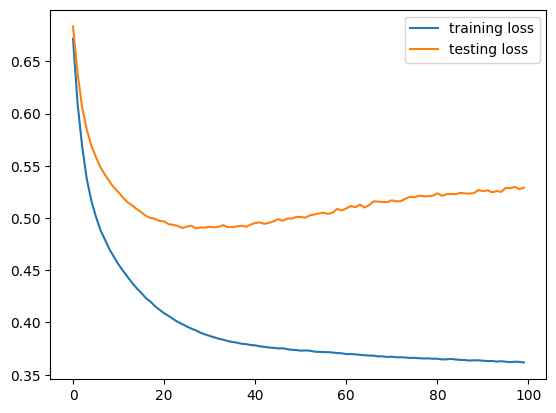

In [26]:
# build the model
input_layer = tf.keras.layers.Dense(10,activation='relu',input_shape=(X_train.shape[1],)) # input layer
#model = tf.keras.layers.Dense(10,activation='relu')(model) # hidden layer
oytput_layer = tf.keras.layers.Dense(1,activation='sigmoid') # output layer

model = tf.keras.models.Sequential([input_layer,
                                    # hidden layer
                                    oytput_layer])

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')

# train the model and plot the data on the training and testing loss 
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')

# plot the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='testing loss')
plt.legend()
plt.show()

# check if GPU is available

In [23]:
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf
import numpy as np
import platform

print(f"Python platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print()
print(f"Python Version: {sys.version}")
print(f"Pandas Version: {pd.__version__}")
print(f"Scikit-Learn Version: {sk.__version__}")
print(f"Scipy Version: {np.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is"," Available:" if gpu else "Not Available")


Python platform: Windows-10-10.0.19045-SP0
Tensor Flow Version: 2.13.0

Python Version: 3.8.20 (default, Oct  3 2024, 15:19:54) [MSC v.1929 64 bit (AMD64)]
Pandas Version: 2.0.3
Scikit-Learn Version: 1.3.2
Scipy Version: 1.24.3
GPU is Not Available
